In [ ]:
import pandas as pd
df = pd.read_csv(r"online_retail_II(Year 2010-2011)_trimmed.csv", header = 0, encoding = 'unicode_escape')
print(df)
print(df.columns)









      Invoice StockCode                          Description  Quantity  \
0         NaN    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      536365     71053                  WHITE METAL LANTERN         6   
2      536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...       ...       ...                                  ...       ...   
15234  537638     21980    PACK OF 12 RED RETROSPOT TISSUES          1   
15235  537638     21981         PACK OF 12 WOODLAND TISSUES          1   
15236  537638     21982             PACK OF 12 SUKI TISSUES          6   
15237  537638     21986     PACK OF 12 PINK POLKADOT TISSUES         2   
15238  537638     21990         MODERN FLORAL STATIONERY SET         5   

           InvoiceDate  Price  CustomerID         Country  
0       12/1/2010 8:26   2.55     17850.0  United K

In [ ]:
'''Obtaining Statistics of Dataset'''
print(f"Price mean {df["Price"].mean()}")
print(f"Quantity mean {df["Quantity"].mean()}")
print(f"Price median {df["Price"].median()}")
print(f"Quantity median {df["Quantity"].median()}")
print(f"Price max {df["Price"].max()}")
print(f"Quantity max {df["Quantity"].max()}")
print(f"Price min {df["Price"].min()}")
print(f"Quantity min {df["Quantity"].min()}")
print(f"Price std {df["Price"].std()}")
print(f"Quantity std {df["Quantity"].std()}")

Price mean 5.878952030973162
Quantity mean 7.398123236432837
Price median 2.51
Quantity median 2.0
Price max 13541.33
Quantity max 2880
Price min 0.0
Quantity min -9360
Price std 156.35699811189056
Quantity std 85.25421385983617


In [ ]:
#dropping any rows that have missing values for invoice, customerid, description, and quantity columns
df  = df.dropna(subset=['Invoice','CustomerID', 'Description', 'Quantity', 'Country'])

#also removing any rows with negatuve quantities or prices
df = df[df.Quantity > 0]


In [ ]:
#Dropping price, invoicedate, country, stockcode
df = df.drop(columns=['Price','InvoiceDate','Country','StockCode'])

In [ ]:
cust_transactions = {}
items_bought = dict()





#groups each trasnaction item to the invoice it was included in via a dictionary

for row in df.itertuples():
    
        id = int(row.CustomerID)
        invoice = str(row.Invoice)

        cust_transactions[id] = cust_transactions.get(id, {})

        temp_dict = cust_transactions[id]
        temp_dict[invoice] =  temp_dict.get(invoice, [])
        temp_dict[invoice].append(str(row.Description))

        cust_transactions[id] = temp_dict




In [ ]:

cust_trans_tuples = []
for customer in list(cust_transactions.keys()):
    transactions_dict = cust_transactions[customer]

    items = list(transactions_dict.values())
    cust_trans_tuples.append((customer, items))


cust_trans_tuples



[(17850,
  [['WHITE METAL LANTERN',
    'CREAM CUPID HEARTS COAT HANGER',
    'KNITTED UNION FLAG HOT WATER BOTTLE',
    'RED WOOLLY HOTTIE WHITE HEART.',
    'SET 7 BABUSHKA NESTING BOXES',
    'GLASS STAR FROSTED T-LIGHT HOLDER'],
   ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'],
   ['HAND WARMER RED POLKA DOT', 'HAND WARMER UNION JACK'],
   ['WHITE HANGING HEART T-LIGHT HOLDER',
    'WHITE METAL LANTERN',
    'CREAM CUPID HEARTS COAT HANGER',
    'EDWARDIAN PARASOL RED',
    'RETRO COFFEE MUGS ASSORTED',
    'SAVE THE PLANET MUG',
    'VINTAGE BILLBOARD DRINK ME MUG',
    'WOOD 2 DRAWER CABINET WHITE FINISH',
    'WOOD S/3 CABINET ANT WHITE FINISH',
    'WOODEN PICTURE FRAME WHITE FINISH',
    'WOODEN FRAME ANTIQUE WHITE ',
    'RED WOOLLY HOTTIE WHITE HEART.',
    'SET 7 BABUSHKA NESTING BOXES',
    'GLASS STAR FROSTED T-LIGHT HOLDER'],
   ['WHITE HANGING HEART T-LIGHT HOLDER',
    'WHITE METAL LANTERN',
    'CREAM CUPID HEARTS COAT HANGER',
    'EDWARDIAN PARASOL RED',
 

In [ ]:
from apyori import apriori
'''ADJUST PARAMETERS FOR MINSUPPORT, min_confidence, etc'''

customer_rule_list = []
counter = 1
for customer,transactions_ in cust_trans_tuples:
    if len(transactions_) < 3:
       #ignoring/not considering customers with less than 3 transactions
       #this is because including them would result in skewed rleations with abnormally high support values
       continue

    rules =  apriori(transactions= transactions_, min_support = 0.01, min_confidence = 0.5, min_lift = 1, max_length  = 2)
    rule_list = list(rules)
    customer_rule_list.append((customer,rule_list))
    

In [ ]:
customer_rule_list

[(17850,
  [RelationRecord(items=frozenset({'GLASS STAR FROSTED T-LIGHT HOLDER'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'GLASS STAR FROSTED T-LIGHT HOLDER'}), confidence=0.5, lift=1.0)]),
   RelationRecord(items=frozenset({'HAND WARMER RED POLKA DOT'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'HAND WARMER RED POLKA DOT'}), confidence=0.5, lift=1.0)]),
   RelationRecord(items=frozenset({'HAND WARMER UNION JACK'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'HAND WARMER UNION JACK'}), confidence=0.5, lift=1.0)]),
   RelationRecord(items=frozenset({'RED WOOLLY HOTTIE WHITE HEART.'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'RED WOOLLY HOTTIE WHITE HEART.'}), confidence=0.5, lift=1.0)]),
   RelationRecord(items=frozenset({'WHITE METAL LANTERN'}), support=0.5, ordered_statis

In [ ]:
cust_top_rules = []

#extracting statisitcs from each relation that was calculated for every customers transaction 
for customer,rules in customer_rule_list:
    extracted = []
    for rule in rules:
        for stat in rule.ordered_statistics:
            if not stat.items_base or not stat.items_add:
                continue
            extracted.append((
            tuple(stat.items_base),
            tuple(stat.items_add),
            rule.support,
            stat.confidence,
            stat.lift
        ))
    extracted.sort(key=lambda x: (x[2],x[4]),reverse=True ) #sorted the transactions of each customer by support then lift
    cust_top_rules.append((customer, extracted[:3])) # for each customer only keep the top 3 rules with the highest support/lift
cust_top_rules

[(17850,
  [(('GLASS STAR FROSTED T-LIGHT HOLDER',),
    ('RED WOOLLY HOTTIE WHITE HEART.',),
    0.5,
    1.0,
    2.0),
   (('RED WOOLLY HOTTIE WHITE HEART.',),
    ('GLASS STAR FROSTED T-LIGHT HOLDER',),
    0.5,
    1.0,
    2.0),
   (('GLASS STAR FROSTED T-LIGHT HOLDER',),
    ('WHITE METAL LANTERN',),
    0.5,
    1.0,
    2.0)]),
 (13047,
  [(('ASSORTED COLOUR BIRD ORNAMENT',),
    ('BOX OF 6 ASSORTED COLOUR TEASPOONS',),
    0.3333333333333333,
    1.0,
    3.0),
   (('BOX OF 6 ASSORTED COLOUR TEASPOONS',),
    ('ASSORTED COLOUR BIRD ORNAMENT',),
    0.3333333333333333,
    1.0,
    3.0),
   (('ASSORTED COLOUR BIRD ORNAMENT',),
    ('BOX OF VINTAGE ALPHABET BLOCKS',),
    0.3333333333333333,
    1.0,
    3.0)]),
 (17809,
  [(('BAKING SET SPACEBOY DESIGN',),
    ('CHARLIE + LOLA RED HOT WATER BOTTLE',),
    0.3333333333333333,
    1.0,
    3.0),
   (('CHARLIE + LOLA RED HOT WATER BOTTLE',),
    ('BAKING SET SPACEBOY DESIGN',),
    0.3333333333333333,
    1.0,
    3.0),
   (('BAK

In [ ]:
#extracting the description, customerid, lift, support, confidence values for each relation and storing it in a data frame
final_results = []
for cust_id,relations in cust_top_rules:
    if len(relations) < 1:
        #if the customer only has one relation then we skip from adding them to the final_result
        continue

    for relation in relations: # for each relation in the list of relations extract its statistics 
        #print(relation)
        final_results.append({
            "Customer ID":cust_id,
            "left":relation[0][0],
            "right":relation[1][0],
            "Support": relation[2],
            "Confidence": relation[3],
            "Lift":relation[4]
        })
        
final_results
        
#storing in data frame
df_results = pd.DataFrame(final_results)
df_results

print(df_results["Lift"].max())


5.5


In [ ]:
        
final_results

[{'Customer ID': 17850,
  'left': 'GLASS STAR FROSTED T-LIGHT HOLDER',
  'right': 'RED WOOLLY HOTTIE WHITE HEART.',
  'Support': 0.5,
  'Confidence': 1.0,
  'Lift': 2.0},
 {'Customer ID': 17850,
  'left': 'RED WOOLLY HOTTIE WHITE HEART.',
  'right': 'GLASS STAR FROSTED T-LIGHT HOLDER',
  'Support': 0.5,
  'Confidence': 1.0,
  'Lift': 2.0},
 {'Customer ID': 17850,
  'left': 'GLASS STAR FROSTED T-LIGHT HOLDER',
  'right': 'WHITE METAL LANTERN',
  'Support': 0.5,
  'Confidence': 1.0,
  'Lift': 2.0},
 {'Customer ID': 13047,
  'left': 'ASSORTED COLOUR BIRD ORNAMENT',
  'right': 'BOX OF 6 ASSORTED COLOUR TEASPOONS',
  'Support': 0.3333333333333333,
  'Confidence': 1.0,
  'Lift': 3.0},
 {'Customer ID': 13047,
  'left': 'BOX OF 6 ASSORTED COLOUR TEASPOONS',
  'right': 'ASSORTED COLOUR BIRD ORNAMENT',
  'Support': 0.3333333333333333,
  'Confidence': 1.0,
  'Lift': 3.0},
 {'Customer ID': 13047,
  'left': 'ASSORTED COLOUR BIRD ORNAMENT',
  'right': 'BOX OF VINTAGE ALPHABET BLOCKS',
  'Support': 0

    Customer ID                          left                         right  \
20        12748   12 PENCILS TALL TUBE SKULLS        PLASTERS IN TIN SKULLS   
18        12748      ASSORTED CREEPY CRAWLIES  REX CASH+CARRY JUMBO SHOPPER   
19        12748  REX CASH+CARRY JUMBO SHOPPER      ASSORTED CREEPY CRAWLIES   
21        14911      3 STRIPEY MICE FELTCRAFT    FELTCRAFT BUTTERFLY HEARTS   
22        14911    FELTCRAFT BUTTERFLY HEARTS      3 STRIPEY MICE FELTCRAFT   

     Support  Confidence      Lift  
20  0.181818         1.0  5.500000  
18  0.272727         1.0  3.666667  
19  0.272727         1.0  3.666667  
21  0.285714         1.0  3.500000  
22  0.285714         1.0  3.500000  


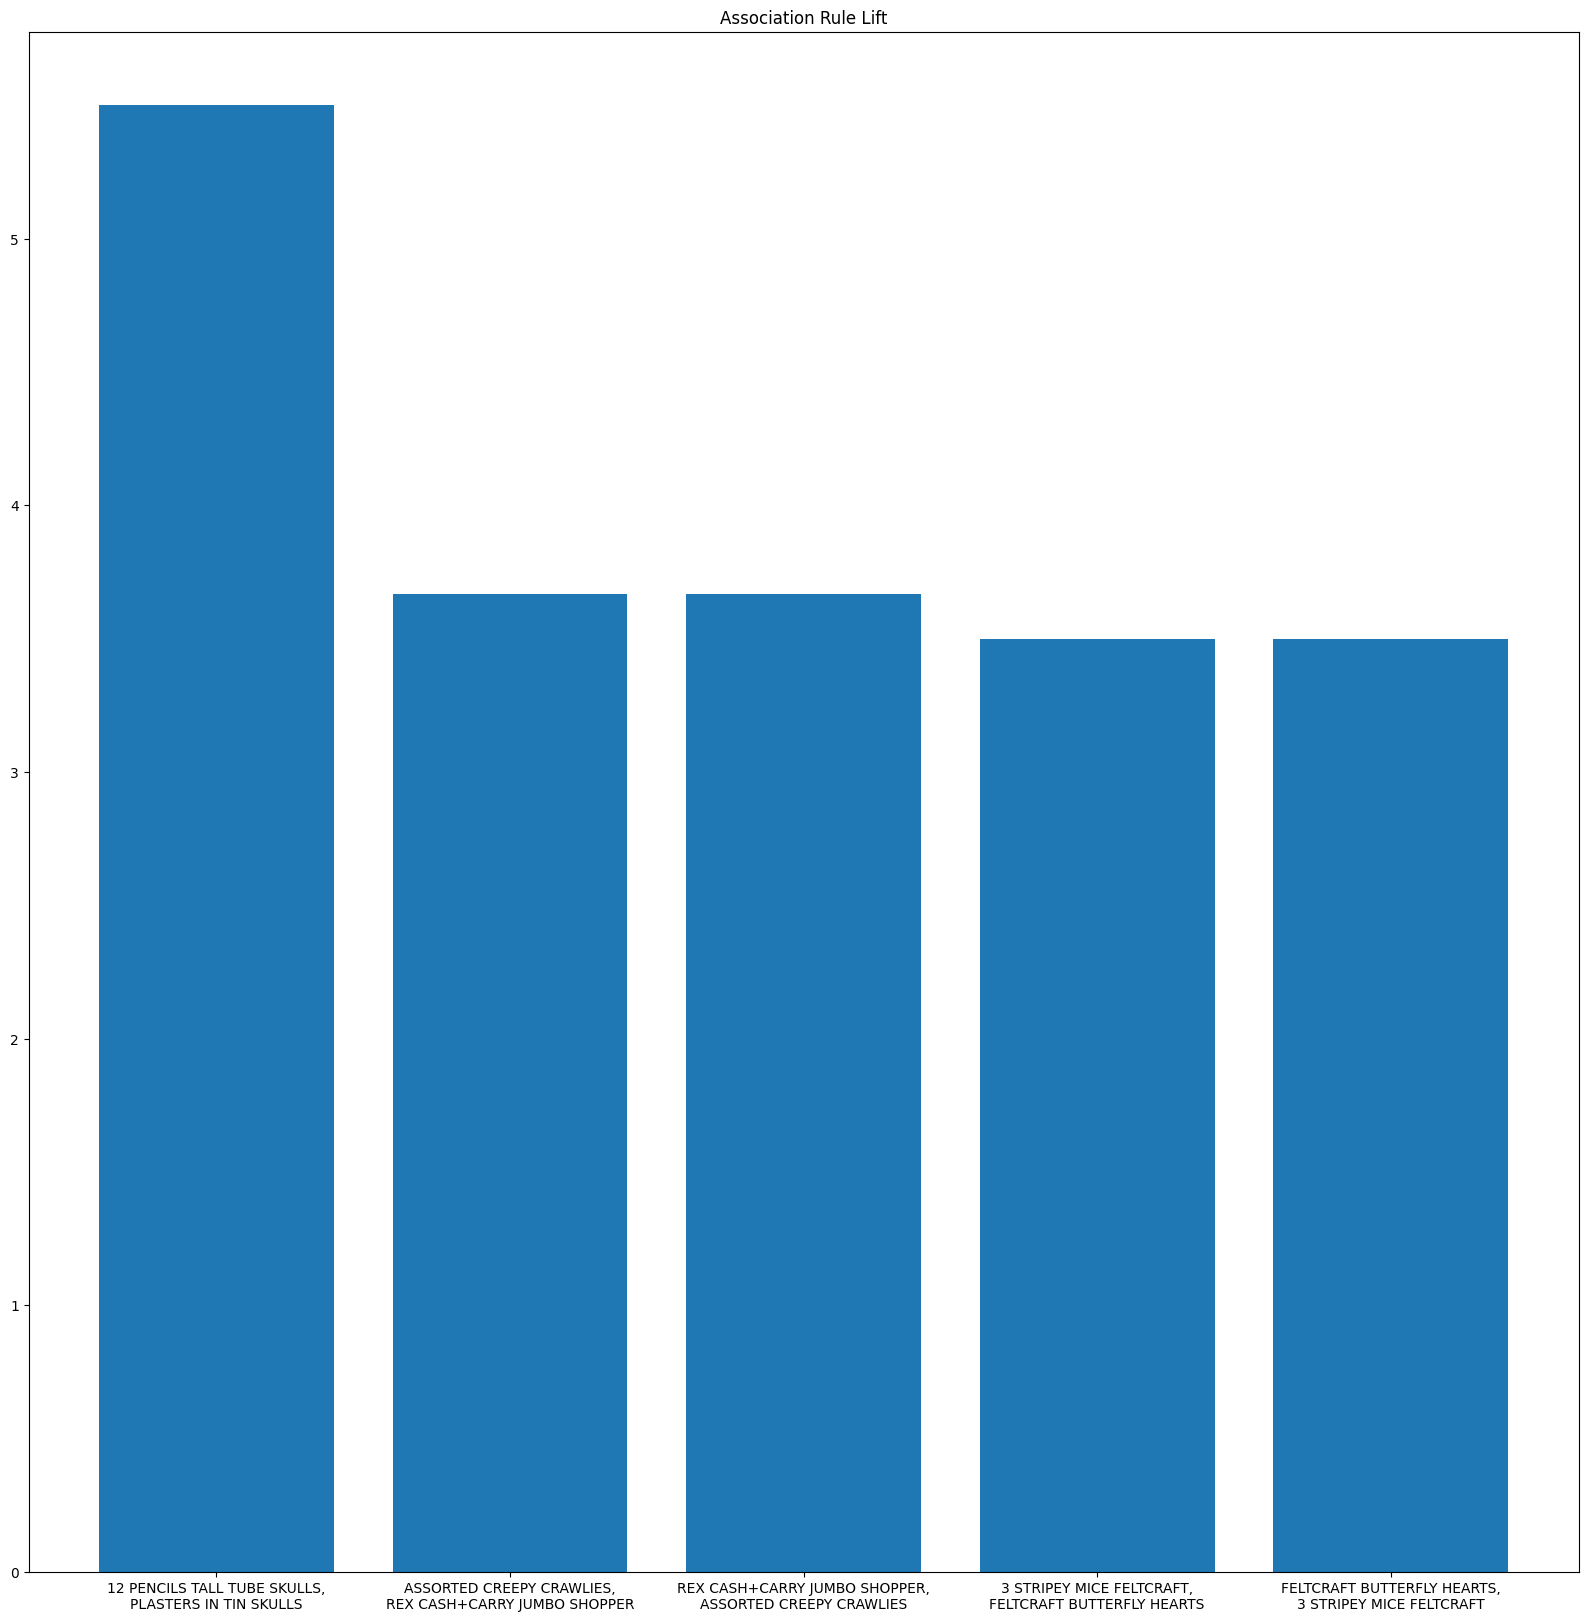

In [ ]:
import matplotlib.pyplot as plt


#plotting and displaying rules with the top 10 lift values and 
five_largest = df_results.nlargest(n=5, columns = 'Lift')
print(five_largest)
plt.figure(figsize=(20,20))
plt.bar(five_largest['left']+ ",\n" + five_largest['right'], five_largest['Lift'])
plt.title("Association Rule Lift")

plt.show()



    Customer ID                             left  \
12        13767       ALARM CLOCK BAKELIKE GREEN   
13        13767        ALARM CLOCK BAKELIKE RED    
14        13767       ALARM CLOCK BAKELIKE GREEN   
24        17841                    CHILLI LIGHTS   
25        17841  DISCO BALL CHRISTMAS DECORATION   

                              right  Support  Confidence  Lift  
12        ALARM CLOCK BAKELIKE RED       1.0         1.0   1.0  
13       ALARM CLOCK BAKELIKE GREEN      1.0         1.0   1.0  
14    SMALL GLASS HEART TRINKET POT      1.0         1.0   1.0  
24  DISCO BALL CHRISTMAS DECORATION      1.0         1.0   1.0  
25                    CHILLI LIGHTS      1.0         1.0   1.0  


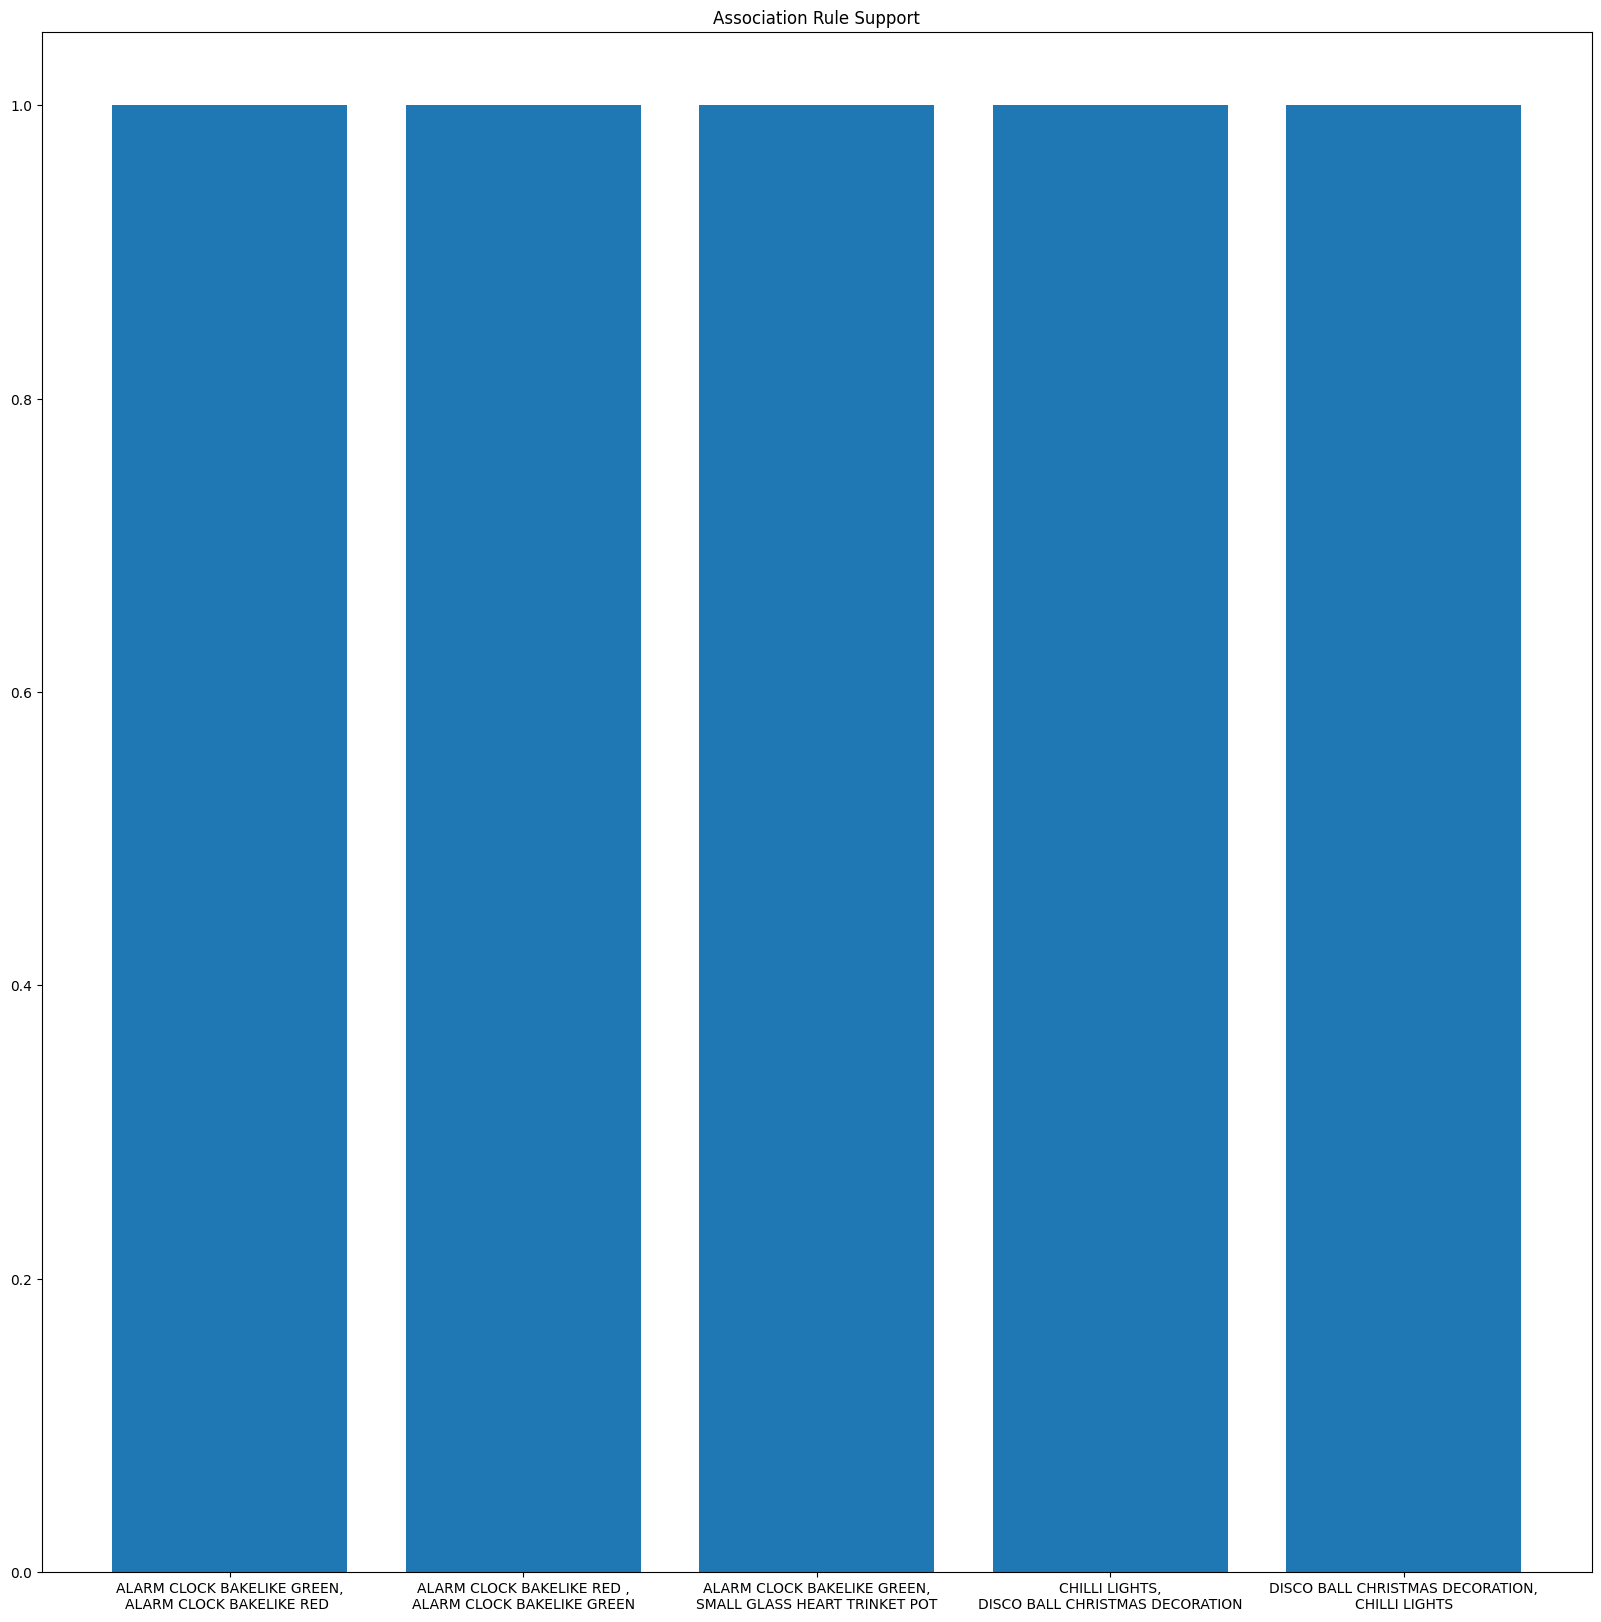

In [ ]:
#plotting and displaying rules with the top 5 support values and 
five_largest = df_results.nlargest(n=5, columns = "Support")
print(five_largest)
plt.figure(figsize=(20,20))
plt.bar(five_largest['left']+ ",\n" + five_largest['right'], five_largest['Support'])
plt.title("Association Rule Support")

plt.show()



   Customer ID                                left  \
0        17850   GLASS STAR FROSTED T-LIGHT HOLDER   
1        17850      RED WOOLLY HOTTIE WHITE HEART.   
2        17850   GLASS STAR FROSTED T-LIGHT HOLDER   
3        13047       ASSORTED COLOUR BIRD ORNAMENT   
4        13047  BOX OF 6 ASSORTED COLOUR TEASPOONS   

                                right   Support  Confidence  Lift  
0      RED WOOLLY HOTTIE WHITE HEART.  0.500000         1.0   2.0  
1   GLASS STAR FROSTED T-LIGHT HOLDER  0.500000         1.0   2.0  
2                 WHITE METAL LANTERN  0.500000         1.0   2.0  
3  BOX OF 6 ASSORTED COLOUR TEASPOONS  0.333333         1.0   3.0  
4       ASSORTED COLOUR BIRD ORNAMENT  0.333333         1.0   3.0  


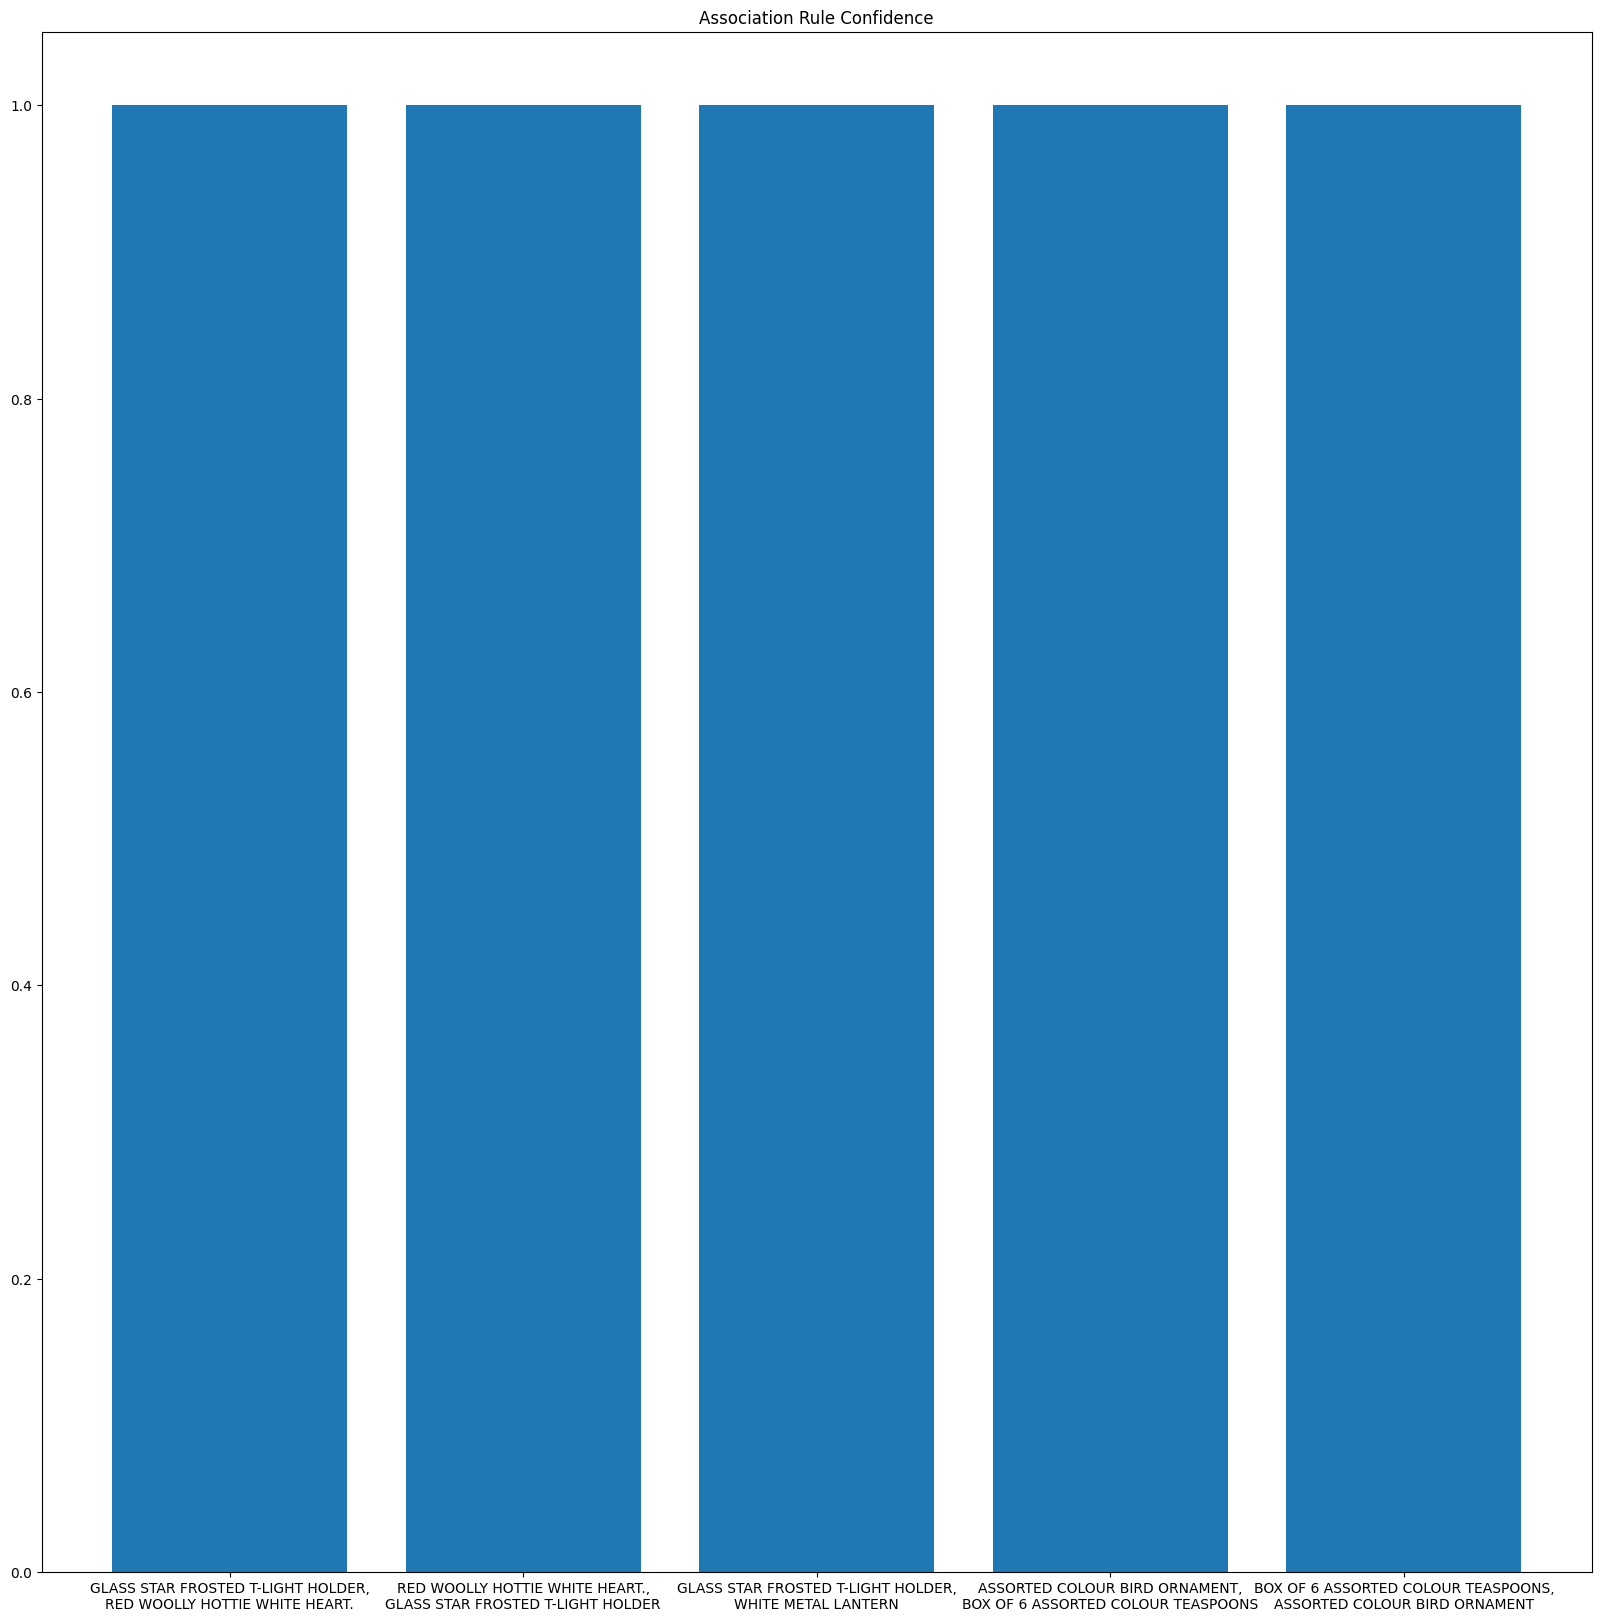

In [ ]:
#plotting and displaying rules with the top 5 confidence values and 
five_largest = df_results.nlargest(n=5, columns = "Confidence")
print(five_largest)
plt.figure(figsize=(20,20))
plt.bar(five_largest['left']+ ",\n" + five_largest['right'], five_largest['Confidence'])
plt.title("Association Rule Confidence")
plt.show()


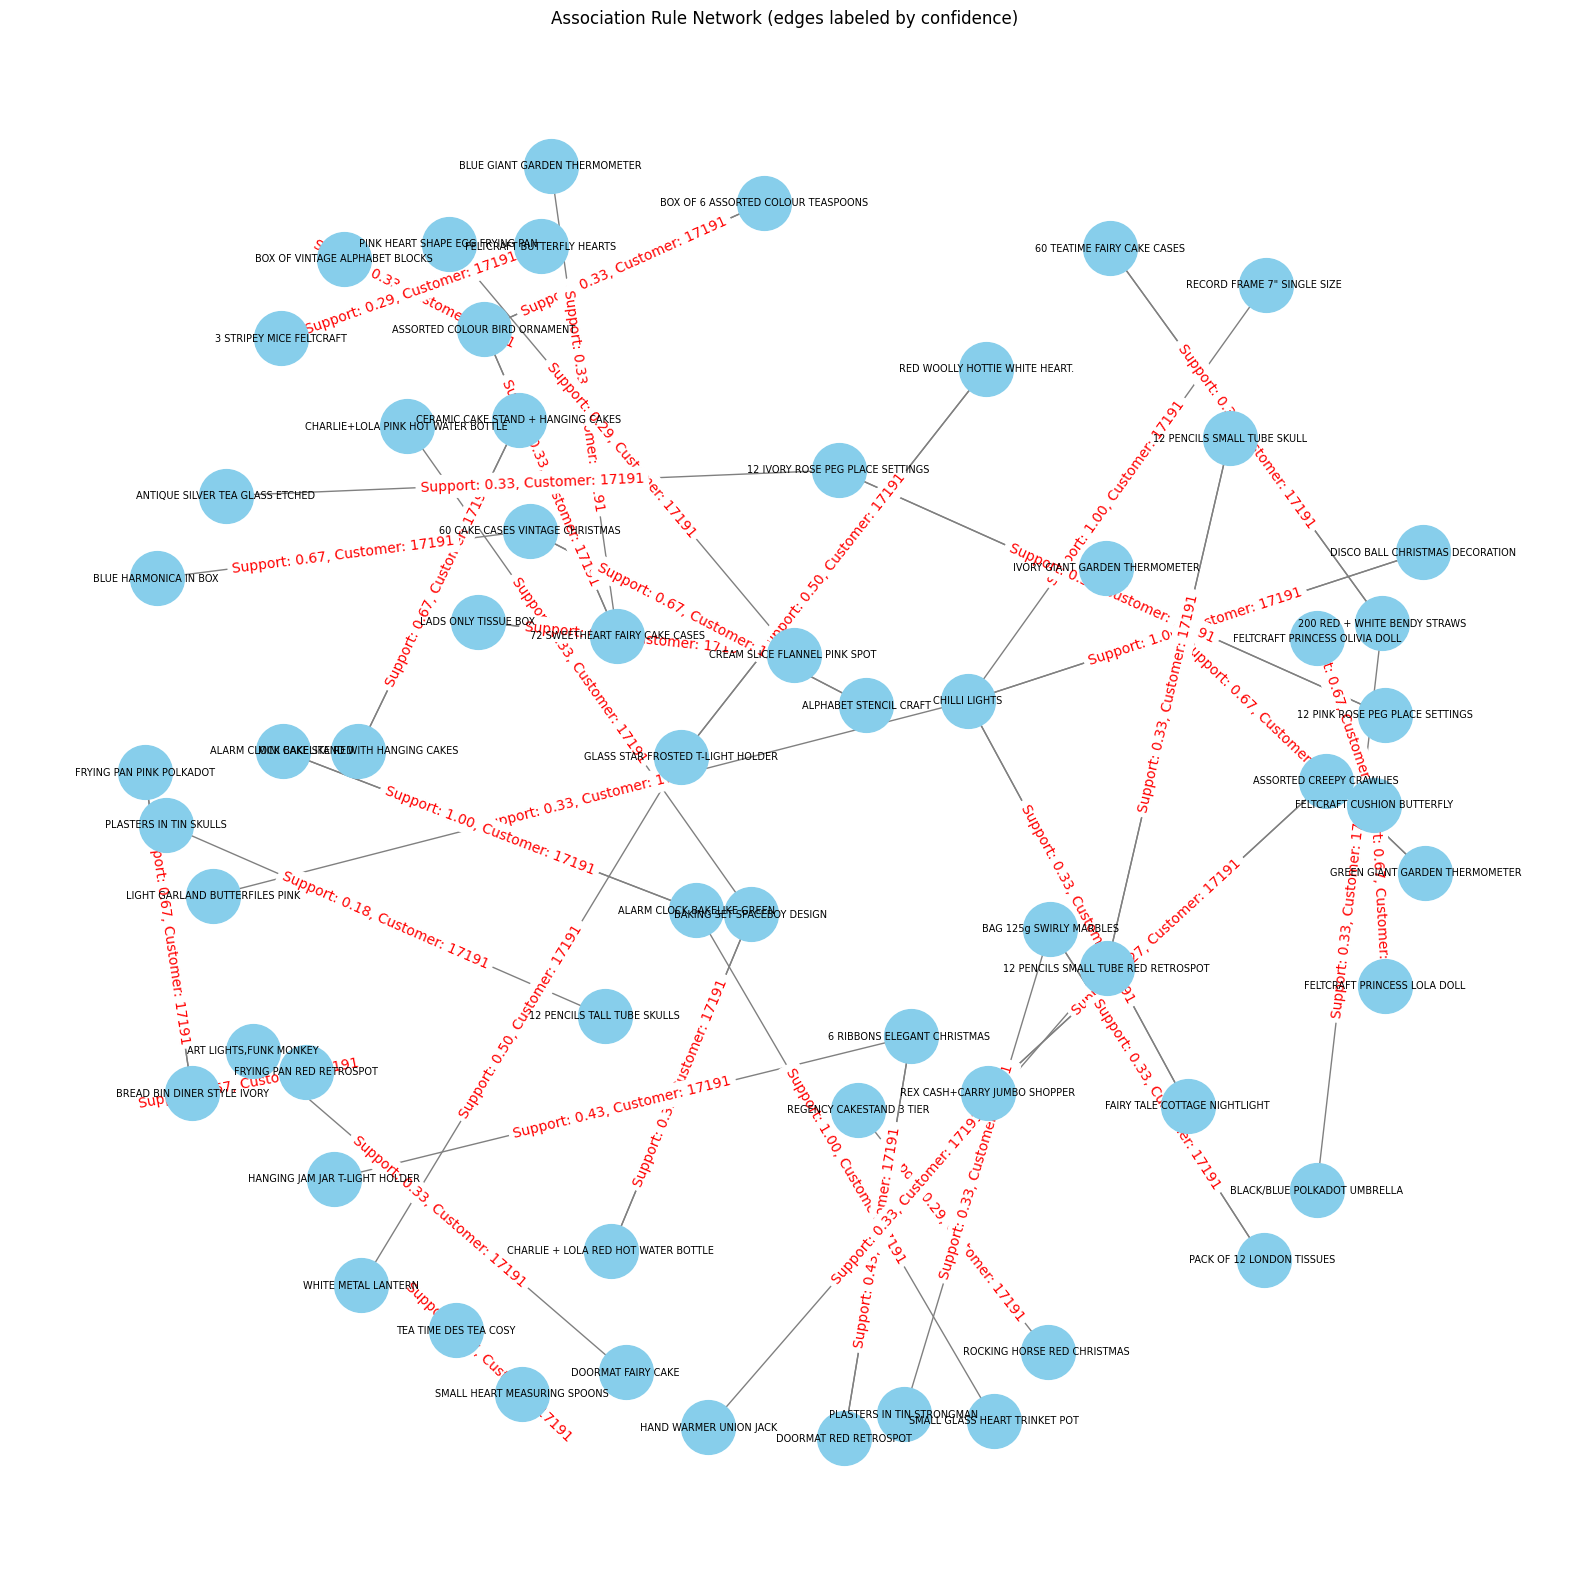

In [ ]:
import networkx as nx


G = nx.DiGraph()
for rule in final_results:
    id = rule["Customer ID"]
    left = rule["left"]

    #print(left)
    right = rule["right"]
    support = rule["Support"]
    confidence = rule["Confidence"]
    lift = rule["Lift"]
    G.add_edge(left, right, lift=lift, confidence=confidence, support=support)



# Draw the graph
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=0.7, seed=42)  # layout for nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color="skyblue")

# Draw edges with arrows
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=7)

# Optionally, add edge labels (e.g. lift or confidence)
edge_labels = {(u,v): f"Support: {d['support']:.2f}, Customer: {rule["Customer ID"]}" for u,v, d in G.edges(data=True)} #displaying support since we want to know what items are most bought per customer
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Association Rule Network (edges labeled by confidence)")
plt.axis('off')
plt.show()


